# Llama3 8B - Evaluation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer
from src.eval.pulse_score import PULSEScoreCalculator

In [2]:
base_output_dir = r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\llama3p18b"
prompt_approaches = os.listdir(base_output_dir)

In [5]:
best_prompt_approach = None

for prompt_approach in prompt_approaches:
    if not os.path.isdir(os.path.join(base_output_dir, prompt_approach)):
        continue
    print(f"Processing {prompt_approach}...")
    cat_files = LLMAnalyzer.categorize_files(
        [os.path.join(base_output_dir, prompt_approach)],
        verbose=False,
    )
    df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])
    ps = PULSEScoreCalculator()
    pulse_score = ps.calculate_pulse_score_from_raw_data(
        df=df_mdata,
    )
    pulse_score = pulse_score["overall"]["pulse_score"]

    if best_prompt_approach is None or pulse_score > best_prompt_approach[1]:
        best_prompt_approach = (prompt_approach, pulse_score)

print(
    f"Best prompt approach: {best_prompt_approach[0]} with PULSE score: {best_prompt_approach[1]}"
)

Processing collaborative_reasoning_agent_preprocessor...


Model Name: Llama3, Task: aki, Dataset: eicu, Timestamp: 20250628_161151
Model Name: Llama3, Task: aki, Dataset: hirid, Timestamp: 20250628_161151
Model Name: Llama3, Task: aki, Dataset: miiv, Timestamp: 20250628_161151
Model Name: Llama3, Task: mortality, Dataset: eicu, Timestamp: 20250628_161151
Model Name: Llama3, Task: mortality, Dataset: hirid, Timestamp: 20250628_161151
Model Name: Llama3, Task: mortality, Dataset: miiv, Timestamp: 20250628_161151
Model Name: Llama3, Task: sepsis, Dataset: eicu, Timestamp: 20250628_161151
Model Name: Llama3, Task: sepsis, Dataset: hirid, Timestamp: 20250628_161151
Model Name: Llama3, Task: sepsis, Dataset: miiv, Timestamp: 20250628_161151
Preparing data for Llama3 PULSE score calculation...
DATA VERIFICATION FOR PULSE SCORE
Model Type: LLM
✓ Required columns present: True
✓ Target Label is binary: True
✓ Predicted Diagnosis is binary: True
✓ Predicted Probability in [0,1]: True
⚠️  Invalid predictions (NaN): 6189

✅ Data format is correct for PUL

KeyError: 'overall'

## Model Metrics

In [4]:
df_results = LLMAnalyzer.load_metrics_from_prompt_approaches(base_output_dir, prompt_approaches)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:719: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


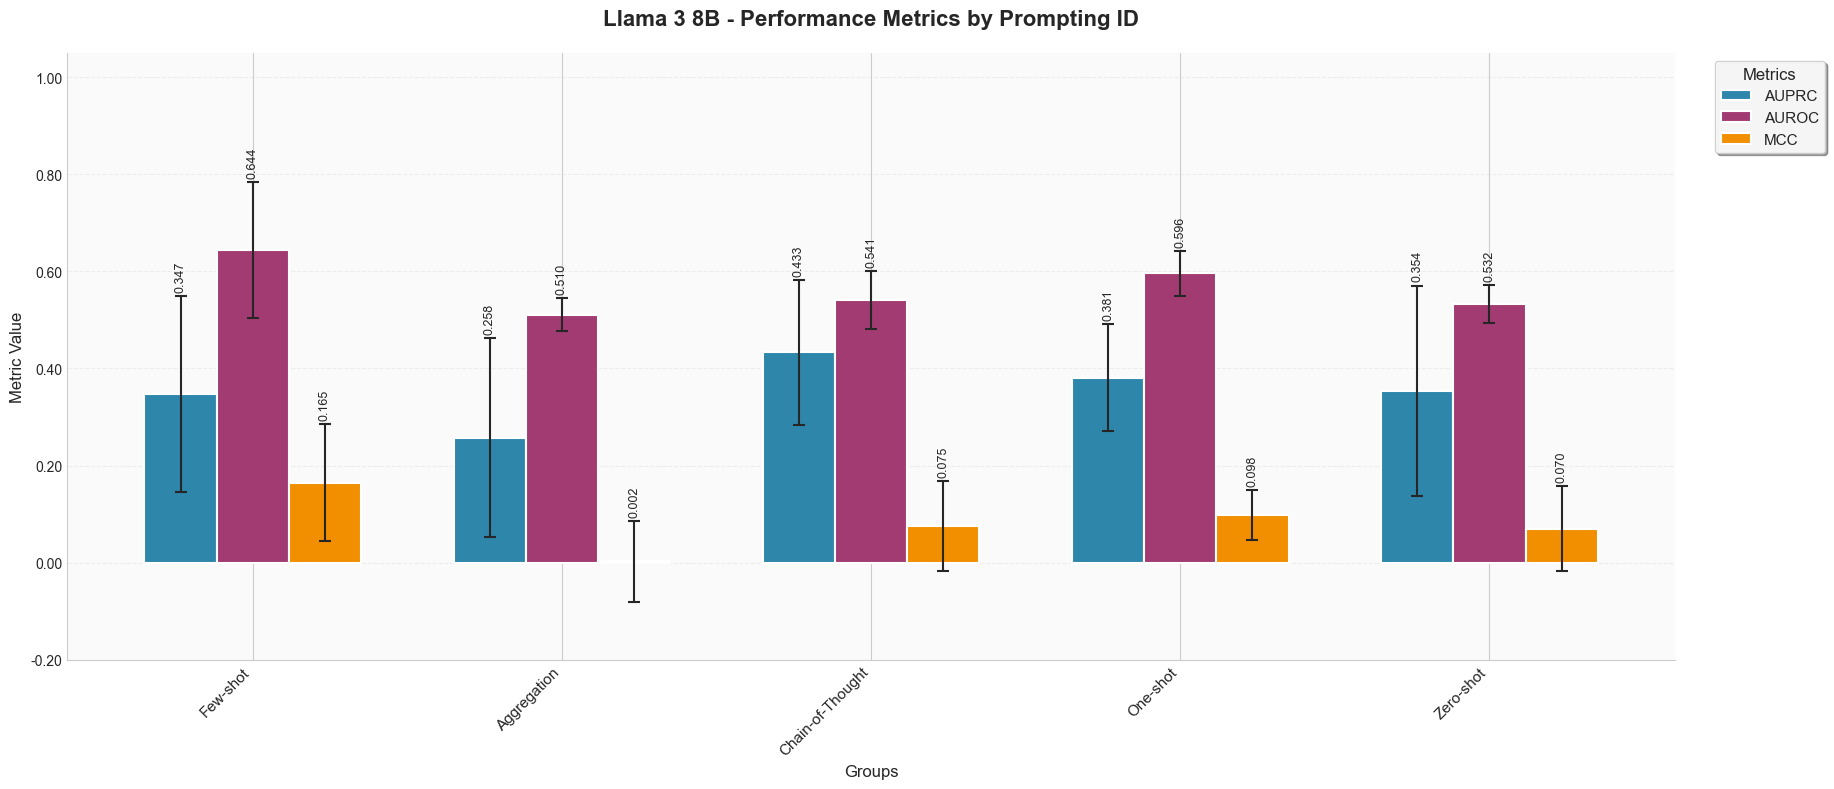

In [5]:
LLMAnalyzer.plot_metrics(
    df_results, group=["prompting_id"], title_prefix="Llama 3 8B - "
)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:719: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


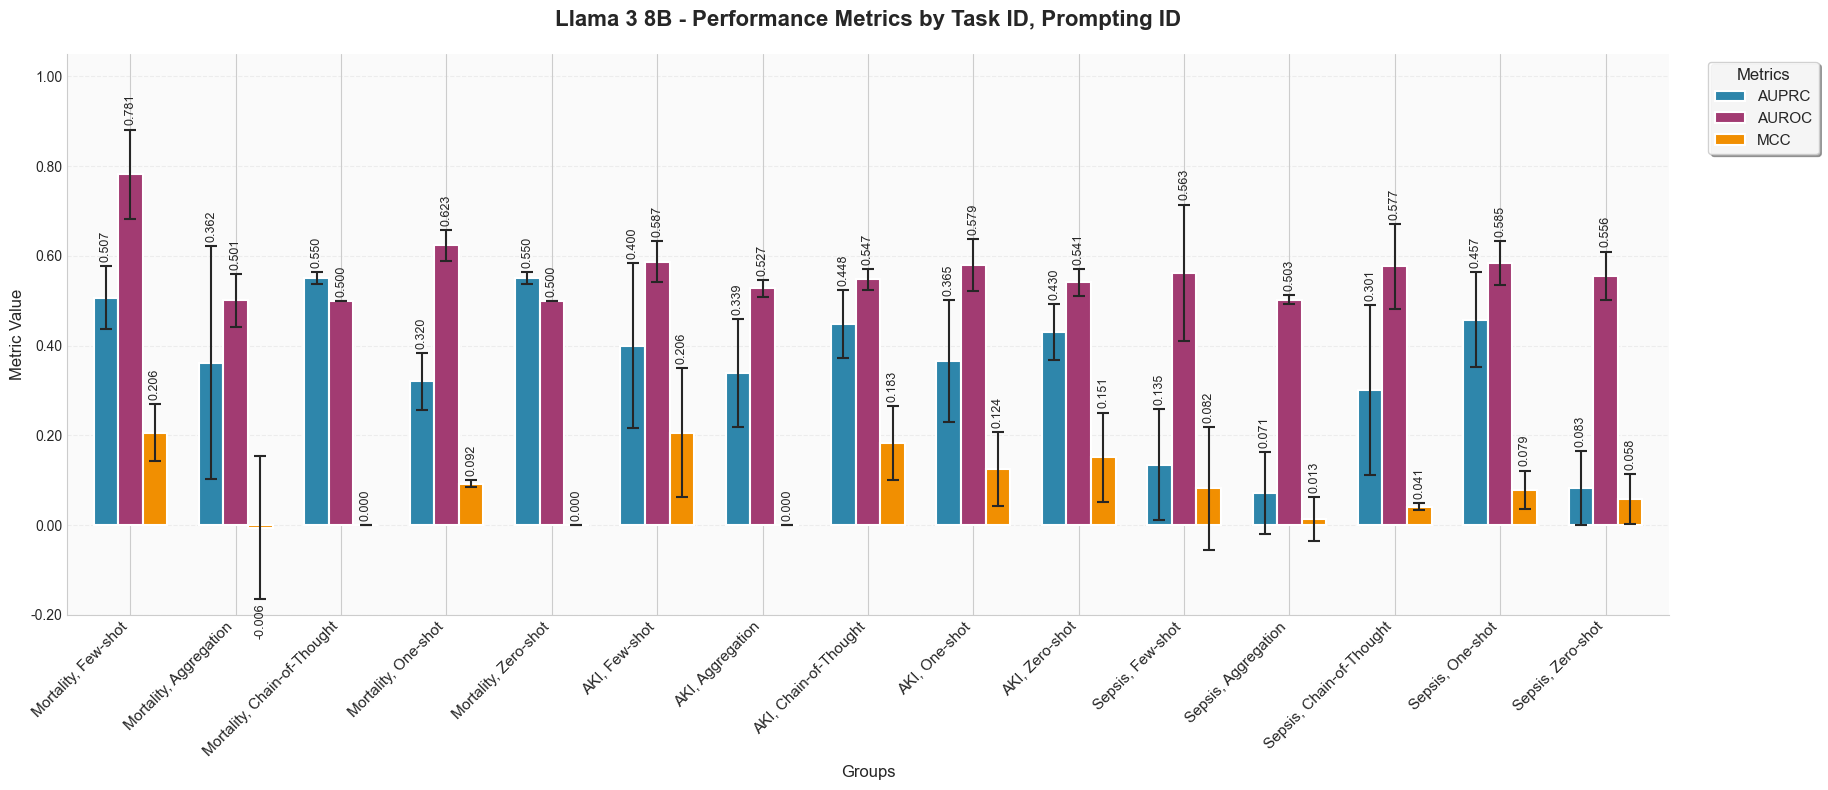

In [6]:
LLMAnalyzer.plot_metrics(
    df_results, group=["task_id","prompting_id"], title_prefix="Llama 3 8B - "
)

In [7]:
cat_files = LLMAnalyzer.categorize_files(
    [os.path.join(base_output_dir, name) for name in os.listdir(base_output_dir)],
    verbose=False,
)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])
print("Total Input Tokens:", df_mdata['Input Tokens'].sum())
print("Total Output Tokens:", df_mdata['Output Tokens'].sum())

Model Name: Llama3, Task: aki, Dataset: eicu, Timestamp: 20250621_095219
Model Name: Llama3, Task: aki, Dataset: hirid, Timestamp: 20250621_095219
Model Name: Llama3, Task: aki, Dataset: miiv, Timestamp: 20250621_095219
Model Name: Llama3, Task: mortality, Dataset: eicu, Timestamp: 20250621_095219
Model Name: Llama3, Task: mortality, Dataset: hirid, Timestamp: 20250621_095219
Model Name: Llama3, Task: mortality, Dataset: miiv, Timestamp: 20250621_095219
Model Name: Llama3, Task: sepsis, Dataset: eicu, Timestamp: 20250621_095219
Model Name: Llama3, Task: sepsis, Dataset: hirid, Timestamp: 20250621_095219
Model Name: Llama3, Task: sepsis, Dataset: miiv, Timestamp: 20250621_095219
Model Name: Llama3, Task: aki, Dataset: eicu, Timestamp: 20250620_201123
Model Name: Llama3, Task: aki, Dataset: hirid, Timestamp: 20250620_201123
Model Name: Llama3, Task: aki, Dataset: miiv, Timestamp: 20250620_201123
Model Name: Llama3, Task: mortality, Dataset: eicu, Timestamp: 20250620_201123
Model Name: Ll

In [8]:
import ipywidgets as widgets
from IPython.display import display

Analysis of best prompting approach

In [9]:
prompt_dropdown = widgets.Dropdown(
    options=prompt_approaches,
    value=best_prompt_approach[0],
    description='Prompt Approach:',
    style={'description_width': 'initial'}
)
display(prompt_dropdown)


Dropdown(description='Prompt Approach:', options=('liu_2023_few_shot_preprocessor', 'sarvari_2024_aggregation_…

In [10]:
best_approach_path = os.path.join(
    base_output_dir, prompt_dropdown.value
)
print(f"Loading metadata from: {best_approach_path}")
print("======================================================")
cat_files = LLMAnalyzer.categorize_files([best_approach_path], verbose=False)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])

Loading metadata from: C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\llama3p18b\liu_2023_few_shot_preprocessor
Model Name: Llama3, Task: aki, Dataset: eicu, Timestamp: 20250621_095219
Model Name: Llama3, Task: aki, Dataset: hirid, Timestamp: 20250621_095219
Model Name: Llama3, Task: aki, Dataset: miiv, Timestamp: 20250621_095219
Model Name: Llama3, Task: mortality, Dataset: eicu, Timestamp: 20250621_095219
Model Name: Llama3, Task: mortality, Dataset: hirid, Timestamp: 20250621_095219
Model Name: Llama3, Task: mortality, Dataset: miiv, Timestamp: 20250621_095219
Model Name: Llama3, Task: sepsis, Dataset: eicu, Timestamp: 20250621_095219
Model Name: Llama3, Task: sepsis, Dataset: hirid, Timestamp: 20250621_095219
Model Name: Llama3, Task: sepsis, Dataset: miiv, Timestamp: 20250621_095219


In [11]:
df_mdata

,Input Prompt,Target Label,Predicted Probability,Predicted Diagnosis,Predicted Explanation,Tokenization Time,Inference Time,Input Tokens,Output Tokens,model_name,task,dataset,timestamp
0,Example Question: Classify the following ICU p...,0,0.82,aki,Acute kidney injury evident: creatinine increa...,0.016890,3.495114,7885,81,Llama3,aki,eicu,20250621_095219
1,Example Question: Classify the following ICU p...,0,0.82,aki,Acute kidney injury evident: creatinine increa...,0.014504,3.421049,7885,81,Llama3,aki,eicu,20250621_095219
2,Example Question: Classify the following ICU p...,0,0.82,aki,Acute kidney injury evident: creatinine increa...,0.014663,3.416884,7885,81,Llama3,aki,eicu,20250621_095219
3,Example Question: Classify the following ICU p...,0,0.82,aki,Acute kidney injury evident: creatinine increa...,0.014600,3.438089,7885,81,Llama3,aki,eicu,20250621_095219
4,Example Question: Classify the following ICU p...,0,0.82,aki,Acute kidney injury evident: creatinine increa...,0.014454,3.437627,7885,81,Llama3,aki,eicu,20250621_095219
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6184,Example Question: Classify the following ICU p...,1,0.13,not-sepsis,Patient shows no signs of sepsis: temperature ...,0.015687,3.693779,7918,88,Llama3,sepsis,miiv,20250621_095219
6185,Example Question: Classify the following ICU p...,1,0.00,not-sepsis,Patient shows no signs of sepsis: temperature ...,0.014795,3.696265,7918,88,Llama3,sepsis,miiv,20250621_095219
6186,Example Question: Classify the following ICU p...,1,0.00,not-sepsis,Patient shows no signs of sepsis: temperature ...,0.014475,3.696868,7918,88,Llama3,sepsis,miiv,20250621_095219
6187,Example Question: Classify the following ICU p...,1,0.00,not-sepsis,Patient shows no signs of sepsis: temperature ...,0.014648,3.692348,7918,88,Llama3,sepsis,miiv,20250621_095219


In [12]:
LLMAnalyzer.print_approach_summary(df_mdata)

,task,dataset,mean_inference_time,total_inference_time,mean_input_tokens,total_input_tokens,mean_output_tokens,total_output_tokens,positive_samples,negative_samples,total_samples,pos_neg_ratio
0,aki,eicu,3.14s,3089.03s,7877,7750863,71,69999,305,679,984,0.45
1,aki,hirid,3.06s,3002.37s,8189,8041855,67,65728,159,823,982,0.19
2,aki,miiv,2.88s,2829.59s,7869,7743343,63,62312,229,755,984,0.30
3,mortality,eicu,7.45s,745.42s,25586,2558598,65,6522,7,93,100,0.08
4,mortality,hirid,8.50s,850.04s,26456,2645552,77,7691,11,89,100,0.12
5,mortality,miiv,8.11s,811.10s,25553,2555311,75,7529,12,88,100,0.14
6,sepsis,eicu,3.79s,3717.07s,7924,7765075,91,88865,47,933,980,0.05
7,sepsis,hirid,4.02s,3898.38s,8199,7945105,96,92700,73,896,969,0.08
8,sepsis,miiv,3.90s,3860.86s,7914,7835244,94,93283,25,965,990,0.03


--- Prediction Distribution Statistics ---
Total Records: 2950
Ground Truth Positive Samples: 693
Ground Truth Negative Samples: 2257
Mean Predicted Probability (Average of All Predictions): 0.239
Std Predicted Probability: 0.378
Calibration Error (|Mean Pred. Prob. - Ground Truth Pos. Rate|): 0.004
True Positives: 327
True Negatives: 1737
False Positives: 520
False Negatives: 366
Accuracy (at 0.5 threshold): 0.700
AUPRC: 0.355


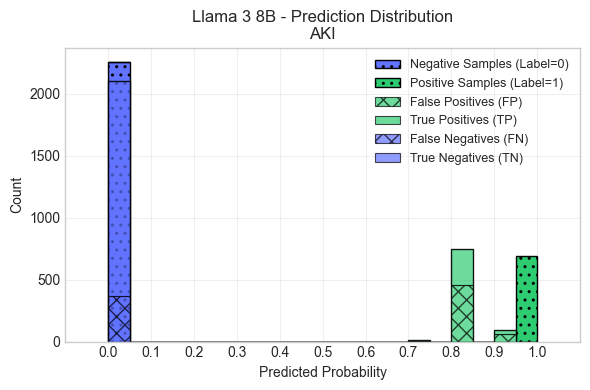

--- Prediction Distribution Statistics ---
Total Records: 300
Ground Truth Positive Samples: 30
Ground Truth Negative Samples: 270
Mean Predicted Probability (Average of All Predictions): 0.586
Std Predicted Probability: 0.395
Calibration Error (|Mean Pred. Prob. - Ground Truth Pos. Rate|): 0.486
True Positives: 28
True Negatives: 108
False Positives: 162
False Negatives: 2
Accuracy (at 0.5 threshold): 0.453
AUPRC: 0.492


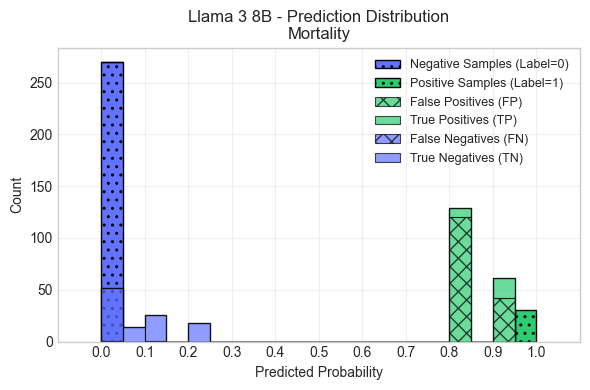

--- Prediction Distribution Statistics ---
Total Records: 2939
Ground Truth Positive Samples: 145
Ground Truth Negative Samples: 2794
Mean Predicted Probability (Average of All Predictions): 0.199
Std Predicted Probability: 0.340
Calibration Error (|Mean Pred. Prob. - Ground Truth Pos. Rate|): 0.150
True Positives: 66
True Negatives: 2203
False Positives: 591
False Negatives: 79
Accuracy (at 0.5 threshold): 0.772
AUPRC: 0.133


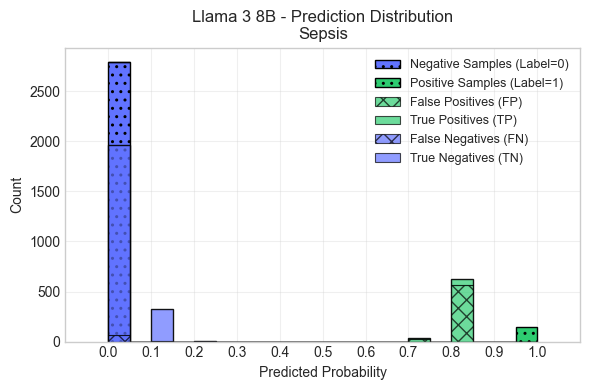

--- Prediction Distribution Statistics ---
Total Records: 6189
Ground Truth Positive Samples: 868
Ground Truth Negative Samples: 5321
Mean Predicted Probability (Average of All Predictions): 0.237
Std Predicted Probability: 0.370
Calibration Error (|Mean Pred. Prob. - Ground Truth Pos. Rate|): 0.097
True Positives: 421
True Negatives: 4048
False Positives: 1273
False Negatives: 447
Accuracy (at 0.5 threshold): 0.722
AUPRC: 0.214


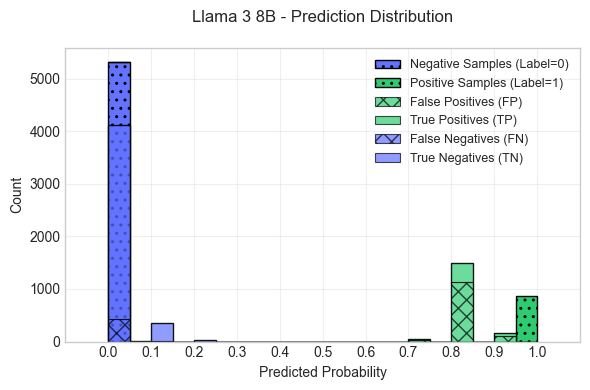

In [13]:
# Distribution of predictions
LLMAnalyzer.plot_prediction_distribution(
    df_mdata,
    title_prefix="Llama 3 8B - Prediction Distribution",
    data_filter={"task": ["aki"]},
    show_stats=True,
    color_neg="#6173FF",
    color_pos="#2ECC71",
)

LLMAnalyzer.plot_prediction_distribution(
    df_mdata,
    title_prefix="Llama 3 8B - Prediction Distribution",
    data_filter={"task": ["mortality"]},
    show_stats=True,
    color_neg="#6173FF",
    color_pos="#2ECC71",
)


LLMAnalyzer.plot_prediction_distribution(
    df_mdata,
    title_prefix="Llama 3 8B - Prediction Distribution",
    data_filter={"task": ["sepsis"]},
    show_stats=True,
    color_neg="#6173FF",
    color_pos="#2ECC71",
)

LLMAnalyzer.plot_prediction_distribution(
    df_mdata,
    title_prefix="Llama 3 8B - Prediction Distribution",
    # data_filter={"task": ["mortality"]},
    show_stats=True,
    color_neg="#6173FF",
    color_pos="#2ECC71",
)

In [14]:
metrics_report = cat_files['metrics_report_files'][0]
df_metrics = pd.read_json(metrics_report)
df_metrics

,model_id,task_id,dataset,prompting_id,run_id,metrics_summary
0,Llama3,mortality,eicu,liu_2023_few_shot_preprocessor,20250621095219,"{'overall': {'auroc': 0.896, 'auprc': 0.585, '..."
1,Llama3,mortality,hirid,liu_2023_few_shot_preprocessor,20250621095219,"{'overall': {'auroc': 0.713, 'auprc': 0.446, '..."
2,Llama3,mortality,miiv,liu_2023_few_shot_preprocessor,20250621095219,"{'overall': {'auroc': 0.735, 'auprc': 0.49, 'n..."
3,Llama3,aki,eicu,liu_2023_few_shot_preprocessor,20250621095219,"{'overall': {'auroc': 0.579, 'auprc': 0.401, '..."
4,Llama3,aki,hirid,liu_2023_few_shot_preprocessor,20250621095219,"{'overall': {'auroc': 0.547, 'auprc': 0.215, '..."
5,Llama3,aki,miiv,liu_2023_few_shot_preprocessor,20250621095219,"{'overall': {'auroc': 0.636, 'auprc': 0.584, '..."
6,Llama3,sepsis,eicu,liu_2023_few_shot_preprocessor,20250621095219,"{'overall': {'auroc': 0.41600000000000004, 'au..."
7,Llama3,sepsis,hirid,liu_2023_few_shot_preprocessor,20250621095219,"{'overall': {'auroc': 0.719, 'auprc': 0.272, '..."
8,Llama3,sepsis,miiv,liu_2023_few_shot_preprocessor,20250621095219,"{'overall': {'auroc': 0.553, 'auprc': 0.098, '..."


In [15]:
import json

# Use relative path for results_json_path
results_json_path = "../docs/results.json"

# Save metrics to results.json using the LLMAnalyzer method
added_count, updated_count = LLMAnalyzer.save_metrics_to_results_json(
    metrics_report_path=metrics_report,
    results_json_path="../docs/results.json"
)

print(f"Added {added_count} records to results.json")
print(f"Updated {updated_count} records in results.json")

# Since LLMAnalyzer handles the file writing, we just need to print the total count
with open(results_json_path, "r", encoding="utf-8") as f:
    results_data = json.load(f)

print(f"Total records in results.json: {len(results_data['results'])}")

Updating existing record: model_id='Llama3', prompting_id='liu_2023_few_shot_preprocessor', task_id='mortality', dataset='eicu', run_id='20250621_095219'
Updating existing record: model_id='Llama3', prompting_id='liu_2023_few_shot_preprocessor', task_id='mortality', dataset='hirid', run_id='20250621_095219'
Updating existing record: model_id='Llama3', prompting_id='liu_2023_few_shot_preprocessor', task_id='mortality', dataset='miiv', run_id='20250621_095219'
Updating existing record: model_id='Llama3', prompting_id='liu_2023_few_shot_preprocessor', task_id='aki', dataset='eicu', run_id='20250621_095219'
Updating existing record: model_id='Llama3', prompting_id='liu_2023_few_shot_preprocessor', task_id='aki', dataset='hirid', run_id='20250621_095219'
Updating existing record: model_id='Llama3', prompting_id='liu_2023_few_shot_preprocessor', task_id='aki', dataset='miiv', run_id='20250621_095219'
Updating existing record: model_id='Llama3', prompting_id='liu_2023_few_shot_preprocessor', 